# Trust Data Analysis
In this notebook, we will be looking into
1. Data Count
2. Drop duplicates and NaN from Train data and check the data count
3. Label distribution
  - 3.1 Gender Label Distribution
  - 3.2 Age Label Distribution
4. Sentence Length
  - 4.1 Getting the sentence length for the data
  - 4.2 Min and Max sentence length
  - 4.3 Top 20 sentence length
  - 4.4 Bottom 20 sentence length
5. Word Count
  - 5.1 Get Each Row Word Count
  - 5.2 Min and Max word length
  - 5.3 Top 20 word length

**Let's Get Started!**

---



# Install Required Packages
*Use "pip install" to install the package*

In [ ]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

# Load Python Libraries


In [ ]:
import numpy as np
import random
import os
import datetime
import datasets
import matplotlib.pyplot as plt
import pandas as pd
import time
import spacy


# Load Spacy model
spaCy is an open-source software library for advanced natural language processing

In [ ]:
nlp = spacy.load("en_core_web_sm")


# Load Train and Test Dataset

In [ ]:
df_train = pd.read_csv("/content/trust_train.csv")
df_test = pd.read_csv("/content/trust_test.csv")

# View train data

In [ ]:
df_train.head() #view top 5 rows
# df_train.tail() #view bottom 5 rows


,label,age,ageRange,id,text
0,1,42,25-54,238,Not the best overall service.
1,1,42,25-54,239,Since it is the #1 social network however with...
2,1,42,25-54,240,"Not only that you can find anything, but its r..."
3,1,42,25-54,241,I'm always satisfied with their level of servi...
4,1,32,25-54,242,"On time, nice chap and worked like a pro - Ver..."


# 1. Data Count

In [ ]:
print("Train Data count:", len(df_train))
print("Test Data count:", len(df_test))

Train Data count: 4996
Test Data count: 403


# 2. Drop duplicates and NaN from Train data
Since we will be using the train data to train the model, it's best to drop the duplicates.

In [ ]:
print("Before dropping:")
print(df_train["label"].value_counts())
df_train.isnull().values.any()
df_train = df_train.drop_duplicates()

print("After dropping:")
print(df_train["label"].value_counts())


Before dropping:
label
0    2501
1    2495
Name: count, dtype: int64
After dropping:
label
0    2501
1    2495
Name: count, dtype: int64



> **Note after running the above cell:** There are no duplicates in the data

# 3. Label distribution

### 3.1 Gender Label Distribution

In [ ]:
print(df_train["label"].value_counts())

label
0    2501
1    2495
Name: count, dtype: int64




> Visualizing the above values



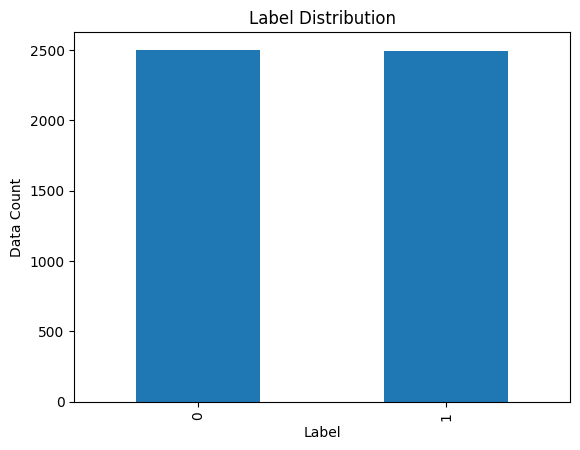

In [ ]:
df_train.label.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Data Count")
plt.title('Gender Label Distribution')
plt.show()


> <b> Note:</b> As seen in the figure, data is balanced. <br> And there are two labels 0 and 1 which is "Female" and "Male"

### 3.2 Age Label Distribution

In [ ]:
print(df_train["ageRange"].value_counts())

ageRange
25-54    2413
65+       981
15-24     807
55-64     795
Name: count, dtype: int64




> Visualizing the above values



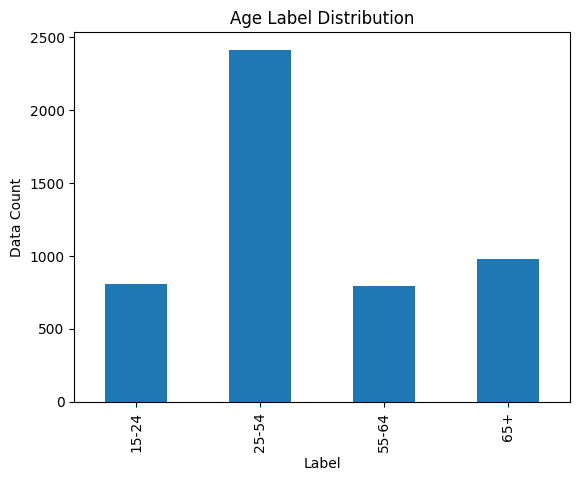

In [ ]:
df_train.ageRange.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Data Count")
plt.title('Age Label Distribution')
plt.show()


> <b> Note:</b> As seen in the figure, data is imbalanced as data for 25-54 is way high compared to other labels<br> There are four labels: 15-24, 25-54, 55-64, 65+

# 4. Sentence Length
Note on library: <br>
<b>NLTK library</b> is faster but has issues in tokenizing sentences. <br> Example: "Use a pen to write (only black pen.)." and nltk sentence tokenizer returns a list of 2 sentences ['Use a pen to write (only black pen.', ').']
<br>
<br>
<b>Spacy</b> is slow but handles such text as it returned 1 sentence ['Use a pen to write (only black pen.).']



In [ ]:
def sent_len(text):
  doc = nlp(text)
  sents_list = [sent.text for sent in doc.sents]
  return len(sents_list)


### 4.1. Getting the sentence length for the data
**NOTE:** it takes approx 2 minutes to run this cell

In [ ]:
import time
st = time.time()
df_train["text_sent_count"] = df_train["text"].apply(sent_len)
en = time.time()
print(en-st)
df_train.head(2)

101.56892275810242


,label,age,ageRange,id,text,text_sent_count
0,1,42,25-54,238,Not the best overall service.,1
1,1,42,25-54,239,Since it is the #1 social network however with...,1


### 4.2 Min and Max sentence length

In [ ]:
df_train['text_sent_count'].agg(['min', 'max'])

min      1
max    105
Name: text_sent_count, dtype: int64

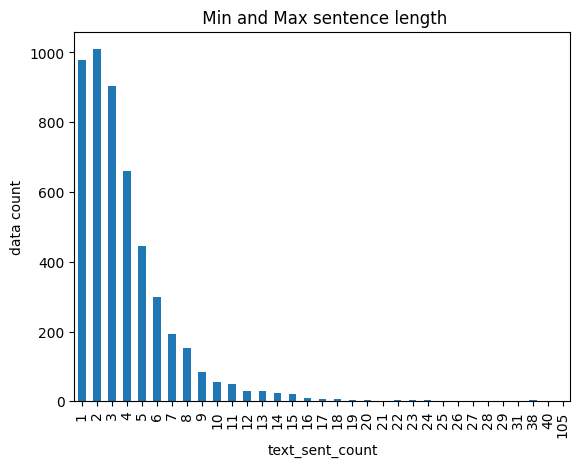

In [ ]:
df_train.text_sent_count.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("text_sent_count")
plt.ylabel("data count")
plt.title(' Min and Max sentence length')
plt.show()

Note: from the figure, we can see that the user uses sentences length ranging from 1-8 alot.

# 4.3 Top 20 sentence length
Steps:
- sort the values
- take top 20
- plot

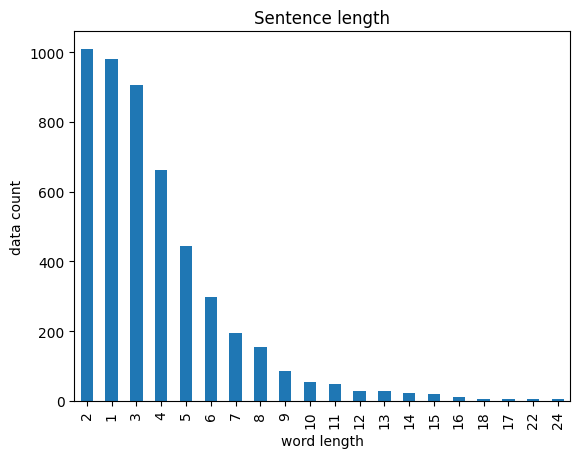

In [ ]:

x = df_train.text_sent_count.value_counts().sort_index(ascending=True)
x = x.sort_values(ascending=False)
x= x[:20]
x.plot(kind='bar')
plt.xlabel("word length")
plt.ylabel("data count")
plt.title('Sentence length')

plt.show()

# 4.4 Bottom 20 sentence length


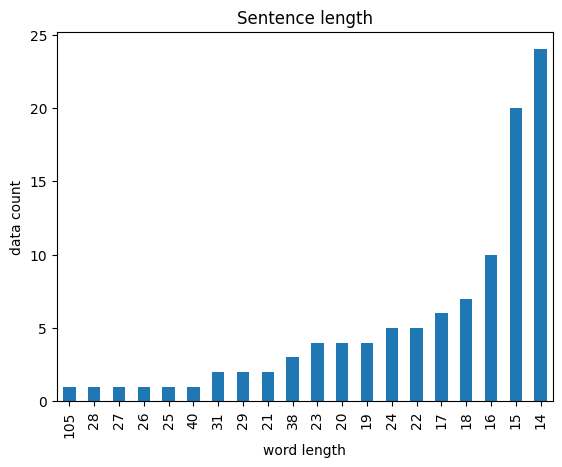

In [ ]:
x = df_train.text_sent_count.value_counts().sort_index(ascending=True)
x = x.sort_values(ascending=True)
x= x[:20]
x.plot(kind='bar')
plt.xlabel("word length")
plt.ylabel("data count")
plt.title('Sentence length')

plt.show()

### 9.5 Let's check rows that has the longest sentence length i.e 105

In [ ]:
df_train[df_train['text_sent_count']==105]

,label,age,ageRange,id,text,text_sent_count,text_word_count
4051,1,59,55-64,4461,BUYER BEWARE !!! How Nissan Of Chesapeake GOT ...,105,1430


In [ ]:
# View only text
list(df_train[df_train['text_sent_count']==105]["text"])

["BUYER BEWARE !!! How Nissan Of Chesapeake GOT AWAY With Charging Me $5K($5,000.00) Above The Sticker Price Of A 2014 Nissan Altima S !!! I Received A Card In The Mail From NOC Telling Me I Owned A 2009 Chrysler 300LX & That My Monthly Payments Were Just $270.00 A Month. They Said They Would Offer 2 Refinance Existing Loan 4 Cheaper Interest Rate Or Trade In My Car Offering Me 10% More Then It Was Worth, Pay Off The Loan, & Give Me A Deal I Could Not Resist On Purchasing A Brand New Car From Them !!! I Called Them & Made An Appointment 4 May 30, 2014 !!! The Sales Team Act As Though They Are Trying Their Best 2 Help U Or Become Your Friends When In Fact What They Are Really Doing Is 2 Get U 2 Drop Your Guard Down So They Can Become Your Worst Enemy & Get As Much Money Out Of U As Possible !!! Here Is How They Conned Me In2 Signing A Binding Contract Paying $200.00 More Each Month 4 The Next 72 Months 4 A Car I Did Not Want !!! Initially I Was Not Even Looking 4 A Brand New Car 2 Purch

# 5. Word Count

In [ ]:
def word_len(text):
  doc = nlp(text)
  words_list = [token.text for token in doc]
  return len(words_list)


### 5.1 Get Each Row Word Count
**This cell takes approx 2 minutes to run**

In [ ]:
import time
st = time.time()
df_train["text_word_count"] = df_train["text"].apply(word_len)
print(time.time()-st)
df_train.head(2)

94.1717882156372


,label,age,ageRange,id,text,text_sent_count,text_word_count
0,1,42,25-54,238,Not the best overall service.,1,6
1,1,42,25-54,239,Since it is the #1 social network however with...,1,53


### 5.2 Min and Max word length

In [ ]:
df_train['text_word_count'].agg(['min', 'max'])

min       1
max    1430
Name: text_word_count, dtype: int64

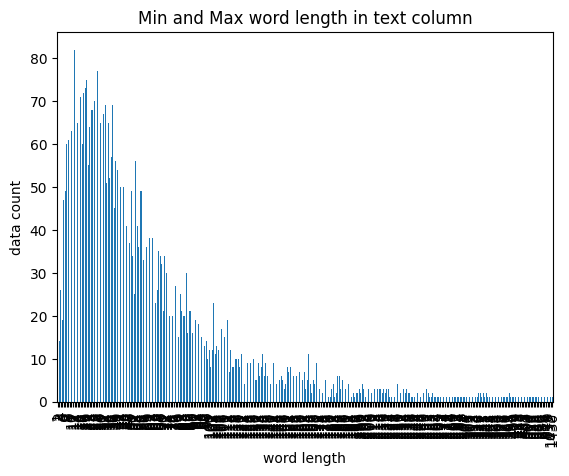

In [ ]:
df_train.text_word_count.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("word length")
plt.ylabel("data count")
plt.title('Min and Max word length in text column')

plt.show()

Note: Since the figure is not clear to understand, Let's take top 20 word counts

# 5.3 Top 20 word length
Steps:
- sort the values
- take top 20
- plot

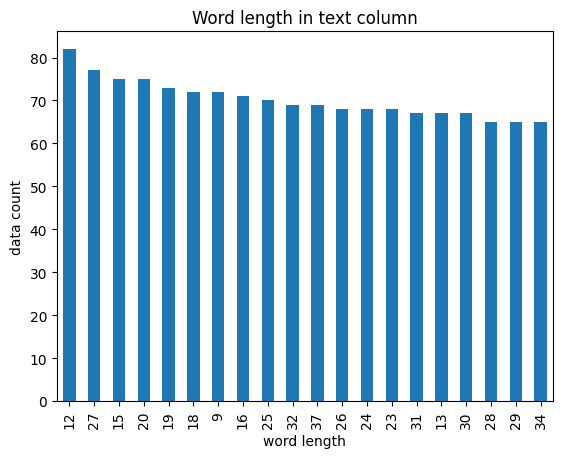

In [ ]:

x = df_train.text_word_count.value_counts().sort_index(ascending=True)
x = x.sort_values(ascending=False)
x= x[:20]
x.plot(kind='bar')
plt.xlabel("word length")
plt.ylabel("data count")
plt.title('Word length in text column')

plt.show()

Note: from the figure we can see that the most common word length is 12